In [ ]:
! pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_obj = SentimentIntensityAnalyzer()

Function to get Compound score

In [ ]:
def sentiment_scores(sentence):

  sentiment_dict = sid_obj.polarity_scores(sentence)
  if sentiment_dict['compound'] >= 0.05 :
    emotion = "positive"
	 
  elif sentiment_dict['compound'] <= -0.05:
    emotion="Negative"
  
  else :
    emotion="Neutral"

  return emotion

List for Comparison-Sequential Comparison

In [ ]:
Neg_1 = ["positive","Negative"]
Neg_2=["Negative","Negative"]
Pos_1 = ["positive","Neutral"]
Pos_2=["positive","positive"]
Neu_1 = ["Negative","Neutral"]
Neu_2=["Neutral","Neutral"]



Neg_1=set(Neg_1)
Neg_2=set(Neg_2)
Pos_1= set(Pos_1)
Pos_2=set(Pos_2)
Neu_1=set(Neu_1)
Neu_2=set(Neu_2)

Function to get the Sentiment by Sequential comparison

In [ ]:
def final_tag(a):
 em = [range(2)]
 em = [a[0]]

 for i in range(1,len(a)):
  em.append(a[i])
  if len(em)==2:
    if set(em) == Neg_1:
      em.clear()
      em.append('Negative')
      i = i+1

    elif set(em) == Neg_2:
      em.clear()
      em.append('Negative')
      i = i+1
  
    elif set(em) == Pos_1:
      em.clear()
      em.append('positive')
      i = i+1      

    elif set(em) == Pos_2:
      em.clear()
      em.append('positive')
      i = i+1

    elif set(em) == Neu_1:
      em.clear()
      em.append('Neutral')
      i = i+1

    elif set(em) == Neu_2:
      em.clear()
      em.append('Neutral')
      i = i+1
 return em

Read the Data set

In [ ]:
Data = pd.read_excel('/content/sample_data/SentimentDataset_Original.xlsx')
Transcript=Data.drop(['id'],axis=1)
# Transcript=Transcript[0:50]
Transcript["Transcript_list"] = ""
Transcript["Begining"] = ""
Transcript["Begining-Tag"] = ""
Transcript["Middle"] = ""
Transcript["Middle-Tag"] = ""
Transcript["End"] = ""
Transcript["End-Tag"] = ""
Transcript

,transcript,Transcript_list,Begining,Begining-Tag,Middle,Middle-Tag,End,End-Tag
0,Amanda: I baked cookies. Do you want some?_x0...,,,,,,,
1,Olivia: Who are you voting for in this electio...,,,,,,,
2,"Tim: Hi, what's up?_x000D_\nKim: Bad mood tbh,...",,,,,,,
3,"Edward: Rachel, I think I'm in ove with Bella....",,,,,,,
4,Sam: hey overheard rick say something_x000D_\...,,,,,,,
...,...,...,...,...,...,...,...,...
495,Serena: Have you been to the doctor lately?_x0...,,,,,,,
496,Gabriella: Hey wassup? How's life/work/the pur...,,,,,,,
497,Stefanie: I was just wondering if the jokes fr...,,,,,,,
498,"Monica: Hi, I won't come to work today. My son...",,,,,,,


Log Sentiment  and add to respective column

In [ ]:
pieces = 3
for i, row in Transcript.iterrows():
  text=row['transcript']
  text=re.sub(r'\w+:\s?','',text)
  text=list(text.split("\n"))
  

  Transcript['Transcript_list'].values[i] = text 

  #Spli the row[list] into three
  new_arrays = np.array_split(text, pieces)
  new_list = list(new_arrays)
  new_list_1 = new_list[0]
  new_list_2 = new_list[1]
  new_list_3 = new_list[2]
  

  a = []
  for sent in new_list_1:
    cmp = sentiment_scores(sent)
    a.append(cmp)
  if len(a) < 2:
    tag_a = a
  else:
    tag_a=final_tag(a)
    
    
  
  b = []
  for sent in new_list_2:
    cmp = sentiment_scores(sent)
    b.append(cmp)
  if len(b) < 2:
    tag_b = b
  else:
    tag_b=final_tag(b)


  c = []
  for sent in new_list_3:
    cmp = sentiment_scores(sent)
    c.append(cmp)
  if len(c) < 2:
    tag_c = c
  else:
    tag_c=final_tag(c)

    
  
  # using list comprehension
  tagofa = ' '.join(map(str, tag_a))
  tagofb = ' '.join(map(str, tag_b))
  tagofc = ' '.join(map(str, tag_c))
  Transcript['Begining'].values[i] = [new_list_1]
  Transcript['Begining-Tag'].values[i] = tagofa
  Transcript['Middle'].values[i] = [new_list_2]
  Transcript['Middle-Tag'].values[i] = tagofb
  Transcript['End'].values[i] = [new_list_3]
  Transcript['End-Tag'].values[i] = tagofc
 







In [ ]:
Transcript

,transcript,Transcript_list,Begining,Begining-Tag,Middle,Middle-Tag,End,End-Tag
0,Amanda: I baked cookies. Do you want some?_x0...,"[I baked cookies. Do you want some?_x000D_, S...",[[I baked cookies. Do you want some?_x000D_]],positive,[[Sure!_x000D_]],Neutral,[[I'll bring you tomorrow :-)]],positive
1,Olivia: Who are you voting for in this electio...,[Who are you voting for in this election? _x00...,[[Who are you voting for in this election? _x0...,Neutral,[[Me too!!_x000D_]],Neutral,[[Great]],positive
2,"Tim: Hi, what's up?_x000D_\nKim: Bad mood tbh,...","[Hi, what's up?_x000D_, Bad mood tbh, I was go...","[[Hi, what's up?_x000D_, Bad mood tbh, I was g...",Neutral,[[Maybe tomorrow I'll move my ass and do every...,positive,"[[It really helps_x000D_, thanks, maybe I'll d...",positive
3,"Edward: Rachel, I think I'm in ove with Bella....","[Rachel, I think I'm in ove with Bella.._x000D...","[[Rachel, I think I'm in ove with Bella.._x000...",Neutral,[[What do you mean??_x000D_]],Neutral,[[Open your fu**ing door.. I'm outside]],Neutral
4,Sam: hey overheard rick say something_x000D_\...,"[hey overheard rick say something_x000D_, i d...","[[hey overheard rick say something_x000D_, i ...",Neutral,"[[wow, how do you feel about it?_x000D_, i tho...",positive,[[honestly if it's bothering you that much you...,positive
...,...,...,...,...,...,...,...,...
495,Serena: Have you been to the doctor lately?_x0...,"[Have you been to the doctor lately?_x000D_, N...","[[Have you been to the doctor lately?_x000D_, ...",positive,[[The cold weather sets it off and if I eat to...,positive,"[[I guess so._x000D_, It sucks, but it doesn't...",positive
496,Gabriella: Hey wassup? How's life/work/the pur...,[Hey wassup? How's life/work/the pursuit of ha...,[[Hey wassup? How's life/work/the pursuit of h...,Neutral,[[Hatchback. So in one week you're going? Ali ...,positive,[[That's pretty goo. Where did you find it?_x0...,positive
497,Stefanie: I was just wondering if the jokes fr...,[I was just wondering if the jokes from my wis...,[[I was just wondering if the jokes from my wi...,Neutral,"[[I havent' dowloaded it, I wanted to do it to...",Neutral,"[[this pops up <file_photo>_x000D_, Maybe atta...",Neutral
498,"Monica: Hi, I won't come to work today. My son...","[Hi, I won't come to work today. My son's ill_...","[[Hi, I won't come to work today. My son's ill...",Neutral,"[[thanks for the info_x000D_, take care!_x000D_]]",positive,[[thanks]],positive


In [ ]:
Transcript.to_excel("/content/sample_data/SentimentDataset - Output.xlsx",
             sheet_name='Output') 

Output Plottings

In [ ]:
B_pos = (Transcript['Begining-Tag']=='positive').sum()
B_neg = (Transcript['Begining-Tag']=='Negative').sum()
B_neu = (Transcript['Begining-Tag']=='Neutral').sum()
M_pos = (Transcript['Middle-Tag']=='positive').sum()
M_neg = (Transcript['Middle-Tag']=='Negative').sum()
M_neu = (Transcript['Middle-Tag']=='Neutral').sum()
E_pos = (Transcript['End-Tag']=='positive').sum()
E_neg = (Transcript['End-Tag']=='Negative').sum()
E_neu = (Transcript['End-Tag']=='Neutral').sum()

In [ ]:
data = [["Beginning", B_pos, B_neg,B_neu],
        ["Middle", M_pos, M_neg,M_neu],
        ["End", E_pos, E_neg,E_neu]]

In [ ]:
Trans_plot = pd.DataFrame(data,columns=["Part_of_Convo", "Positive", "Negative","Neutral"])
Trans_plot

,Part_of_Convo,Positive,Negative,Neutral
0,Beginning,238,48,214
1,Middle,266,65,169
2,End,359,56,85


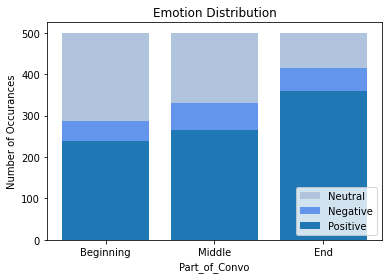

<Figure size 1080x288 with 0 Axes>

In [ ]:
# import matplotlib library
import matplotlib.pyplot as plt
  
# configure the plot
plt.bar(Trans_plot["Part_of_Convo"], Trans_plot["Neutral"], bottom=Trans_plot["Negative"]+Trans_plot["Positive"],color="lightsteelblue")
plt.bar(Trans_plot["Part_of_Convo"], Trans_plot["Negative"], bottom= Trans_plot["Positive"],color="cornflowerblue")
plt.bar(Trans_plot["Part_of_Convo"], Trans_plot["Positive"])
plt.xlabel("Part_of_Convo")
plt.ylabel("Number of Occurances")
plt.legend(["Neutral", "Negative", "Positive"],loc = 4)
plt.title("Emotion Distribution")
plt.figure(figsize=(15,4))
plt.show()